In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_low(x,w):
    tmp = 0.
    for i in range(len(w)):
        tmp = tmp+np.cos(w[i]*x)/len(w)
    return tmp
    
def f_high(x,w):
    tmp = 0.
    for i in range(len(w)-1):
        tmp = tmp + np.cos(w[i]*x)/(len(w)-1)
    tmp = tmp * np.cos(w[-1]*x+np.pi/6)
    return tmp

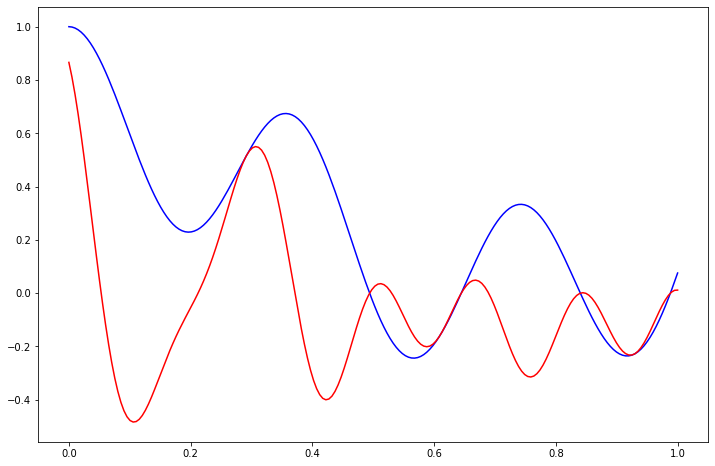

In [2]:
np.random.seed(89)

w1 = np.random.normal(0,10,3).reshape(-1,1)
w2 = np.random.normal(20,1,1).reshape(-1,1)
w3 = np.vstack((w1,w2))

X_plot = np.linspace(0,1,200)[:,None]
f_c=f_low(X_plot,w1)
f_e=f_high(X_plot,w3)

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(X_plot,f_c,'b-')
plt.plot(X_plot,f_e,'r-')
plt.show()

In [3]:
print(w3)

[[-16.93730027]
 [ -0.02121333]
 [ -4.2589184 ]
 [ 19.74440954]]


In [4]:
num_cheap = 50
num_expensive = 10

#num_cheap = 24
#num_expensive = 5

#num_cheap = 12
#num_expensive = 5

X1 = np.linspace(0,1,num_cheap)[:,None]
#X2 = np.linspace(0,1,num_expensive)[:,None]
X2 = np.random.rand(num_expensive)[:,None]

In [5]:
noise_level = 0.1

#Yc = f_high(X1,w1)+ noise_level * np.random.normal(0,1,num_cheap)[:,None]
Yc = f_low(X1,w1)+ noise_level * np.random.normal(0,1,num_cheap)[:,None]

Ye = f_high(X2,w3) + 0.001 * np.random.normal(0,1,num_expensive)[:,None]

In [6]:
X=[]
X.append(X1)
X.append(X2)

In [7]:
Y=[]
Y.append(Yc)
Y.append(Ye)

In [8]:
from prettytable import PrettyTable
#import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error, r2_score
import emukit.examples.multi_fidelity_dgp

In [9]:
from emukit.core import ContinuousParameter, ParameterSpace
from emukit.core.initial_designs import LatinDesign
from emukit.examples.multi_fidelity_dgp.multi_fidelity_deep_gp import MultiFidelityDeepGP

/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/luck1226/anaconda3/lib/python3.6/site-packages/tensorflow/python/f

In [10]:
mf_dgp_fix_lf_mean = MultiFidelityDeepGP(X, Y, n_iter=5000)
mf_dgp_fix_lf_mean.optimize()

In [11]:
mf_dgp_fix_lf_mean.name = 'mf_dgp_fix_lf_mean'

X_test = np.linspace(0,1,99)[:,None]
tmp = [1.]*99
tmp = np.array(tmp).reshape(-1,1)
tmp.shape

X_test = np.hstack((X_test,tmp))

y_mean, y_var = mf_dgp_fix_lf_mean.predict(X_test)

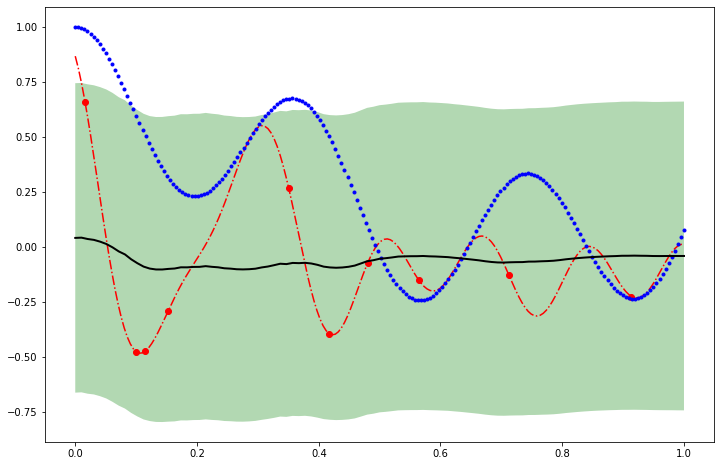

In [13]:
y_up = y_mean+1.96*np.sqrt(y_var)
y_down = y_mean - 1.96*np.sqrt(y_var)

X_plot = np.linspace(0,1,200)[:,None]
f_c=f_low(X_plot,w1)
f_e=f_high(X_plot,w3)

fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(X2,Ye,'ro')
plt.plot(X_plot,f_e,'r-.')
plt.plot(X_plot,f_c,'b.')
plt.plot(X_test[:,0],y_mean,'k-',linewidth=2)
plt.fill_between(np.array(X_test[:,0]).flatten(),np.array(y_up).flatten(),np.array(y_down).flatten(),facecolor='g',alpha=0.3)
plt.show()